In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [31]:
df = pd.read_csv('application_train.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223279,358611,0,Cash loans,M,Y,Y,0,218250.0,269550.0,19300.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223280,358612,0,Cash loans,M,Y,Y,0,585000.0,312678.0,28809.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
223281,358613,0,Cash loans,F,N,N,0,90000.0,364896.0,18760.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223282,358614,0,Cash loans,M,Y,N,0,180000.0,178290.0,19048.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [32]:
df1 = df[['TARGET', 'CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']]
df1

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,1,0,202500.0,406597.5,24700.5
1,0,0,270000.0,1293502.5,35698.5
2,0,0,67500.0,135000.0,6750.0
3,0,0,135000.0,312682.5,29686.5
4,0,0,121500.0,513000.0,21865.5
...,...,...,...,...,...
223279,0,0,218250.0,269550.0,19300.5
223280,0,0,585000.0,312678.0,28809.0
223281,0,0,90000.0,364896.0,18760.5
223282,0,0,180000.0,178290.0,19048.5


In [33]:
df2 = df1.dropna()
df2

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,1,0,202500.0,406597.5,24700.5
1,0,0,270000.0,1293502.5,35698.5
2,0,0,67500.0,135000.0,6750.0
3,0,0,135000.0,312682.5,29686.5
4,0,0,121500.0,513000.0,21865.5
...,...,...,...,...,...
223279,0,0,218250.0,269550.0,19300.5
223280,0,0,585000.0,312678.0,28809.0
223281,0,0,90000.0,364896.0,18760.5
223282,0,0,180000.0,178290.0,19048.5


In [61]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:, 0:4]
Y = df2.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

#Decission Tree

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from xgboost import plot_importance
from sklearn.tree import plot_tree

In [63]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [64]:
y_pred = clf.predict(X_test)
print("Classification report : \n\n", classification_report(y_test,y_pred))

Classification report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41058
           1       1.00      1.00      1.00      3597

    accuracy                           1.00     44655
   macro avg       1.00      1.00      1.00     44655
weighted avg       1.00      1.00      1.00     44655



Text(0.5, 1.0, 'Accuracy Score: 1.0')

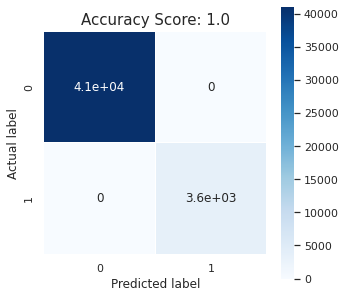

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

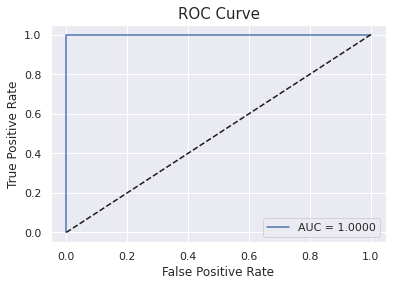

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = clf.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

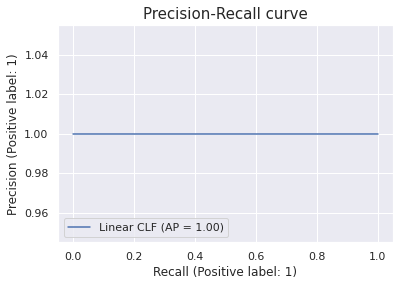

In [43]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Linear CLF"
)
_ = display.ax_.set_title("Precision-Recall curve", size = 15)

In [45]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

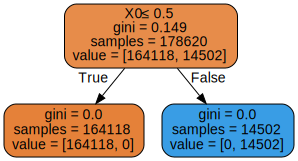

In [46]:
dot_data = tree.export_graphviz(clf, out_file=None,     
filled=True, rounded=True,  
special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#XGBoost

In [47]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [48]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [49]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train,y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.59783
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.520185
[2]	validation_0-logloss:0.455263
[3]	validation_0-logloss:0.400454
[4]	validation_0-logloss:0.35359
[5]	validation_0-logloss:0.313463
[6]	validation_0-logloss:0.278339
[7]	validation_0-logloss:0.247967
[8]	validation_0-logloss:0.221089
[9]	validation_0-logloss:0.197619
[10]	validation_0-logloss:0.176762
[11]	validation_0-logloss:0.158353
[12]	validation_0-logloss:0.142088
[13]	validation_0-logloss:0.127491
[14]	validation_0-logloss:0.114606
[15]	validation_0-logloss:0.103033
[16]	validation_0-logloss:0.09276
[17]	validation_0-logloss:0.083494
[18]	validation_0-logloss:0.0752
[19]	validation_0-logloss:0.067797
[20]	validation_0-logloss:0.061069
[21]	validation_0-logloss:0.055104
[22]	validation_0-logloss:0.049707
[23]	validation_0-logloss:0.044893
[24]	validation_0-logloss:0.040506
[25]	validation_0-logloss:0.036586
[26]	validation_0-logloss:0.033042
[2

XGBClassifier()

In [50]:
y_pred = xgb.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41045
           1       1.00      1.00      1.00      3610

    accuracy                           1.00     44655
   macro avg       1.00      1.00      1.00     44655
weighted avg       1.00      1.00      1.00     44655



Text(0.5, 1.0, 'Accuracy Score: 1.0')

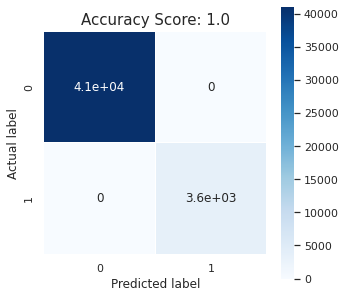

In [51]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

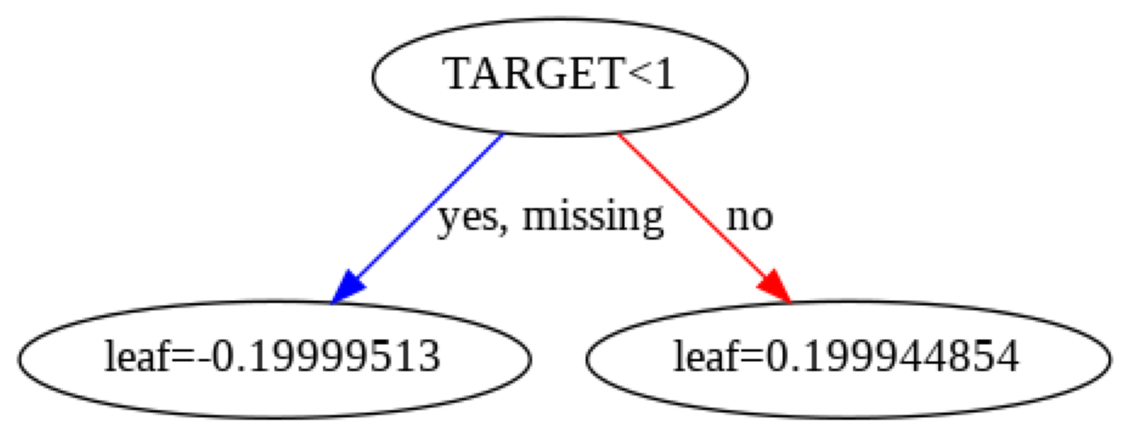

In [65]:
import xgboost as xgb
plt.figure(figsize=(20,20))
xgb.plot_tree(model, ax=plt.gca());